In [1]:
import numpy as np
from yahist import Hist1D
import matplotlib.pyplot as plt

np.random.seed(42)

## 1D histograms

A histogram object is a collection of bin counts, edges, (potentially asymmetric) errors, and maybe some metadata

In [2]:
Hist1D().__dict__

{'_counts': array([0.]),
 '_edges': array([0., 1.]),
 '_errors': array([0.]),
 '_errors_up': None,
 '_errors_down': None,
 '_metadata': {}}

Constructing a `Hist1D` object uses the full `np.histogram` constructor under the hood. The `metadata` kwarg is attached to the histogram as metadata.

Make two histograms (`num`erator and `den`ominator) which are filled with some random numbers.

In [3]:
bins = np.linspace(-3,3,31)
v = np.random.normal(0,1,2000)
num = Hist1D(v[:len(v)//2],bins=bins,label="num", metadata=dict(myattr=2))
den = Hist1D(v[:len(v)//1],bins=bins,label="den")

In [4]:
num.metadata

{'label': 'num', 'myattr': 2}

In the terminal, the `__repr__` prints out bin counts and errors.

In [5]:
print((num/den).rebin(3))

[ 1.20 ± 0.64    1.70 ± 0.68    1.64 ± 0.23    1.50 ± 0.15    1.52 ± 0.13
  1.49 ± 0.12    1.49 ± 0.14    1.36 ± 0.20    1.41 ± 0.35    1.50 ± 0.66]


In a notebook, this is prettily formatted into an HTML table next to an SVG plot.

In [6]:
num

[ 1.00 ± 1.00    3.00 ± 1.73    2.00 ± 1.41    2.00 ± 1.41    9.00 ± 3.00
 10.00 ± 3.16   17.00 ± 4.12   31.00 ± 5.57   34.00 ± 5.83   38.00 ± 6.16
 54.00 ± 7.35   63.00 ± 7.94   87.00 ± 9.33   68.00 ± 8.25   71.00 ± 8.43
 85.00 ± 9.22   88.00 ± 9.38   63.00 ± 7.94   71.00 ± 8.43   48.00 ± 6.93
 44.00 ± 6.63   20.00 ± 4.47   35.00 ± 5.92   16.00 ± 4.00   16.00 ± 4.00
 11.00 ± 3.32    3.00 ± 1.73    6.00 ± 2.45    2.00 ± 1.41    2.00 ± 1.41]

Or, just explicitly plot it with matplotlib.

<AxesSubplot:>

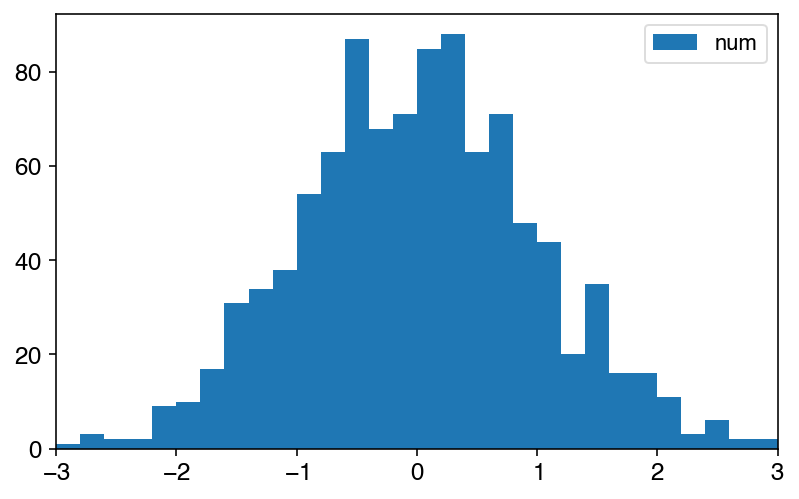

In [7]:
num.plot()

Change the style and show bin counts with some more options.

<AxesSubplot:>

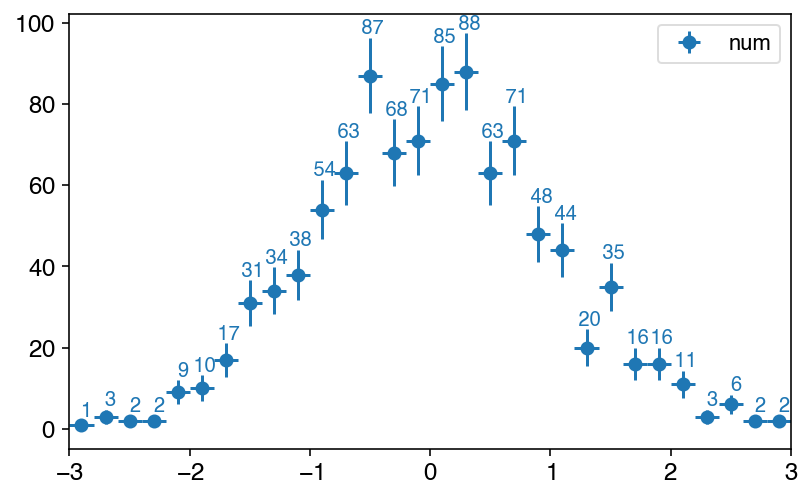

In [8]:
num.plot(show_errors=True,show_counts=True)

If you like pretty things...

<AxesSubplot:>

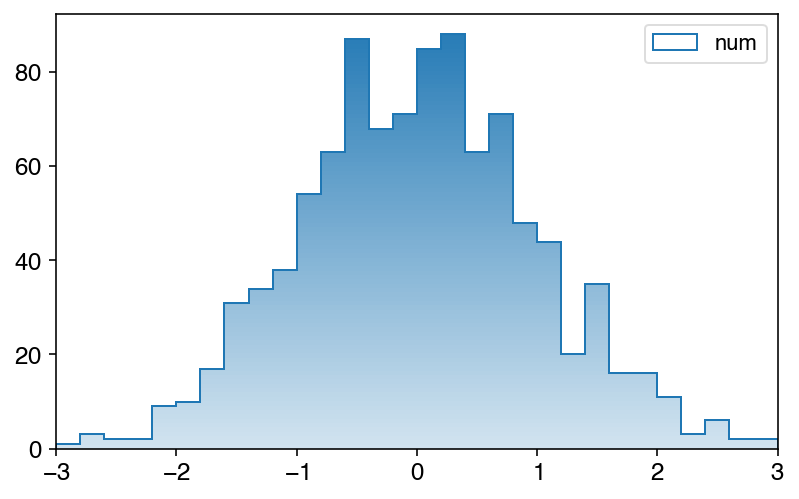

In [9]:
num.plot(gradient=True)

Do math with the histograms and merge 3 bins into one

In [10]:
2*(num/den).rebin(3)

[ 2.40 ± 1.29    3.40 ± 1.36    3.28 ± 0.47    3.00 ± 0.30    3.05 ± 0.25
  2.98 ± 0.24    2.99 ± 0.29    2.71 ± 0.40    2.83 ± 0.71    3.00 ± 1.32]

Binning can be specified explicitly as a list of edges
```python
np.linspace(-3,3,31)
```
or as a more compact string following the CERN ROOT-like convention of `nbins,lower,upper`
```python
"30,-3,3"
```
or the `bins` kwarg can be ommitted entirely to use the automatic binning provided by `np.histogram`.

In [11]:
v = np.random.normal(0, 2, 1000)
Hist1D(v)

[ 2.00 ± 1.41    5.00 ± 2.24    2.00 ± 1.41   12.00 ± 3.46   16.00 ± 4.00
 25.00 ± 5.00   43.00 ± 6.56   53.00 ± 7.28   75.00 ± 8.66   98.00 ± 9.90
 101.00 ± 10.05   94.00 ± 9.70   91.00 ± 9.54   103.00 ± 10.15
 88.00 ± 9.38   64.00 ± 8.00   39.00 ± 6.24   38.00 ± 6.16   23.00 ± 4.80
 16.00 ± 4.00    2.00 ± 1.41    4.00 ± 2.00    2.00 ± 1.41    3.00 ± 1.73
  0.00 ± 0.00    0.00 ± 0.00    1.00 ± 1.00]

By default, overflows are clipped to fall into the edges of the histogram range. This can be disabled (effectively ignoring entries outside of the bin range).

<AxesSubplot:>

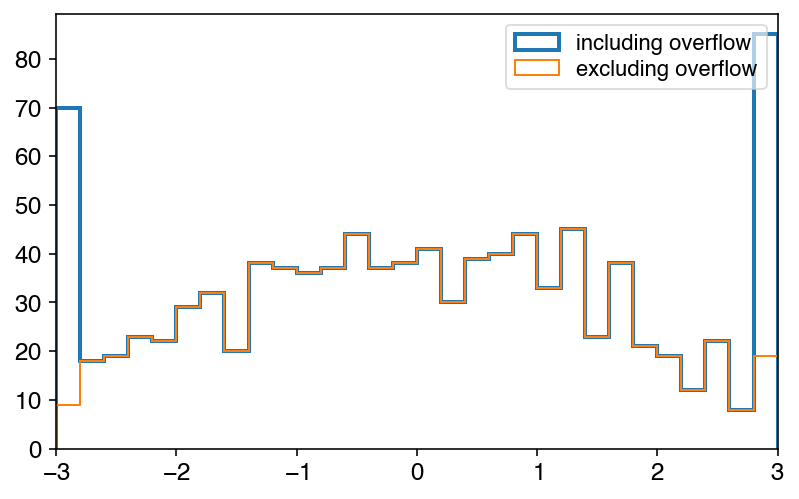

In [12]:
h1 = Hist1D(v, bins="30,-3,3")
h2 = Hist1D(v, bins="30,-3,3", overflow=False)

h1.plot(histtype="step", label="including overflow", linewidth=2)
h2.plot(histtype="step", label="excluding overflow", linewidth=1)

Make a more complicated plot with a ratio panel.

<AxesSubplot:>

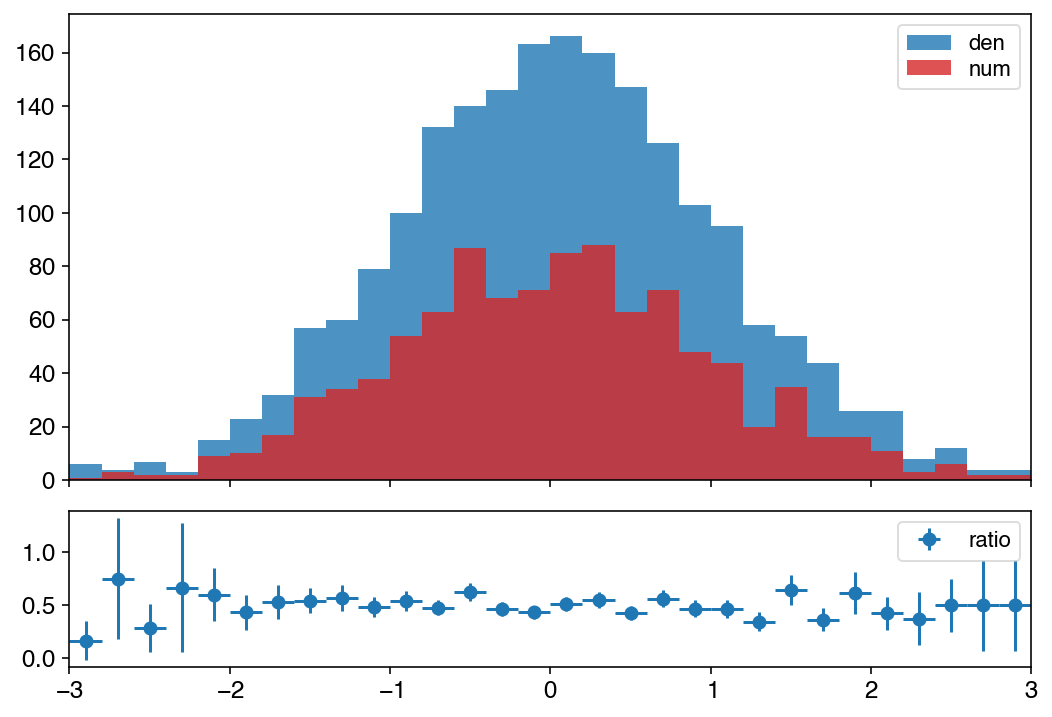

In [13]:
fig,(ax1,ax2) = plt.subplots(2,sharex=True,figsize=(8,6),gridspec_kw=dict(height_ratios=[3, 1]))
den.plot(ax=ax1,alpha=0.8,color="C0")
num.plot(ax=ax1,alpha=0.8,color="C3")
(num/den).plot(ax=ax2,show_errors=True,label="ratio")

Generate histograms from `scipy.stats` random distributions quickly

In [14]:
Hist1D.from_random("expon")

[4551.00 ± 67.46   4497.00 ± 67.06   4184.00 ± 64.68   4007.00 ± 63.30
 3729.00 ± 61.07   3732.00 ± 61.09   3422.00 ± 58.50   3278.00 ± 57.25
 3293.00 ± 57.38   2958.00 ± 54.39   2754.00 ± 52.48   2830.00 ± 53.20
 2572.00 ± 50.71   2469.00 ± 49.69   2389.00 ± 48.88   2304.00 ± 48.00
 2190.00 ± 46.80   2097.00 ± 45.79   1957.00 ± 44.24   1865.00 ± 43.19
 1822.00 ± 42.68   1693.00 ± 41.15   1688.00 ± 41.09   1566.00 ± 39.57
 1490.00 ± 38.60   1428.00 ± 37.79   1359.00 ± 36.86   1286.00 ± 35.86
 1168.00 ± 34.18   1212.00 ± 34.81   1082.00 ± 32.89   1096.00 ± 33.11
 1028.00 ± 32.06   975.00 ± 31.22   889.00 ± 29.82   904.00 ± 30.07
 882.00 ± 29.70   815.00 ± 28.55   744.00 ± 27.28   709.00 ± 26.63
 717.00 ± 26.78   688.00 ± 26.23   630.00 ± 25.10   644.00 ± 25.38
 578.00 ± 24.04   555.00 ± 23.56   548.00 ± 23.41   496.00 ± 22.27
 459.00 ± 21.42   451.00 ± 21.24   440.00 ± 20.98   409.00 ± 20.22
 401.00 ± 20.02   365.00 ± 19.10   348.00 ± 18.65   362.00 ± 19.03
 349.00 ± 18.68   319.00 ± 17.86   297.00 ± 17.23   260.00 ± 16.12
 263.00 ± 16.22   264.00 ± 16.25   258.00 ± 16.06   237.00 ± 15.39
 229.00 ± 15.13   206.00 ± 14.35   213.00 ± 14.59   186.00 ± 13.64
 169.00 ± 13.00   175.00 ± 13.23   152.00 ± 12.33   155.00 ± 12.45
 158.00 ± 12.57   157.00 ± 12.53   128.00 ± 11.31   144.00 ± 12.00
 113.00 ± 10.63   116.00 ± 10.77   114.00 ± 10.68   105.00 ± 10.25
 112.00 ± 10.58   89.00 ± 9.43   94.00 ± 9.70   65.00 ± 8.06
 83.00 ± 9.11   82.00 ± 9.06   83.00 ± 9.11   66.00 ± 8.12   72.00 ± 8.49
 76.00 ± 8.72   69.00 ± 8.31   68.00 ± 8.25   43.00 ± 6.56   54.00 ± 7.35
 58.00 ± 7.62   54.00 ± 7.35   52.00 ± 7.21   60.00 ± 7.75   46.00 ± 6.78
 41.00 ± 6.40   30.00 ± 5.48   37.00 ± 6.08   46.00 ± 6.78   34.00 ± 5.83
 43.00 ± 6.56   28.00 ± 5.29   33.00 ± 5.74   33.00 ± 5.74   35.00 ± 5.92
 20.00 ± 4.47   22.00 ± 4.69   14.00 ± 3.74   16.00 ± 4.00   17.00 ± 4.12
 28.00 ± 5.29   18.00 ± 4.24   18.00 ± 4.24   27.00 ± 5.20   11.00 ± 3.32
 10.00 ± 3.16   19.00 ± 4.36   14.00 ± 3.74   10.00 ± 3.16   13.00 ± 3.61
 15.00 ± 3.87   12.00 ± 3.46   16.00 ± 4.00    9.00 ± 3.00    6.00 ± 2.45
 11.00 ± 3.32    8.00 ± 2.83    9.00 ± 3.00    7.00 ± 2.65    8.00 ± 2.83
  8.00 ± 2.83    8.00 ± 2.83   11.00 ± 3.32   10.00 ± 3.16    7.00 ± 2.65
 14.00 ± 3.74    7.00 ± 2.65    7.00 ± 2.65    7.00 ± 2.65    6.00 ± 2.45
  6.00 ± 2.45    5.00 ± 2.24    4.00 ± 2.00    1.00 ± 1.00    4.00 ± 2.00
  2.00 ± 1.41    3.00 ± 1.73    1.00 ± 1.00    3.00 ± 1.73    2.00 ± 1.41
  1.00 ± 1.00    3.00 ± 1.73    3.00 ± 1.73    3.00 ± 1.73    3.00 ± 1.73
  4.00 ± 2.00    1.00 ± 1.00    2.00 ± 1.41    0.00 ± 0.00    4.00 ± 2.00
  0.00 ± 0.00    3.00 ± 1.73    1.00 ± 1.00    2.00 ± 1.41    1.00 ± 1.00
  2.00 ± 1.41    2.00 ± 1.41    3.00 ± 1.73    2.00 ± 1.41    1.00 ± 1.00
  1.00 ± 1.00    0.00 ± 0.00    3.00 ± 1.73    1.00 ± 1.00    0.00 ± 0.00
  2.00 ± 1.41    1.00 ± 1.00    1.00 ± 1.00    1.00 ± 1.00    1.00 ± 1.00
  1.00 ± 1.00    2.00 ± 1.41    0.00 ± 0.00    1.00 ± 1.00    1.00 ± 1.00
  2.00 ± 1.41    1.00 ± 1.00    0.00 ± 0.00    0.00 ± 0.00    1.00 ± 1.00
  0.00 ± 0.00    1.00 ± 1.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00
  0.00 ± 0.00    0.00 ± 0.00    1.00 ± 1.00    0.00 ± 0.00    0.00 ± 0.00
  0.00 ± 0.00    0.00 ± 0.00    1.00 ± 1.00    0.00 ± 0.00    0.00 ± 0.00
  0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    1.00 ± 1.00
  0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00
  0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    1.00 ± 1.00    0.00 ± 0.00
  0.00 ± 0.00    1.00 ± 1.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00
  0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00
  0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00
  0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00
  0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    1.00 ± 1.00]

In [15]:
Hist1D.from_random("norm", bins="100,-3,3", size=1e3)

[ 0.00 ± 0.00    1.00 ± 1.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00
  0.00 ± 0.00    1.00 ± 1.00    2.00 ± 1.41    1.00 ± 1.00    1.00 ± 1.00
  1.00 ± 1.00    1.00 ± 1.00    4.00 ± 2.00    3.00 ± 1.73    5.00 ± 2.24
  5.00 ± 2.24    4.00 ± 2.00    3.00 ± 1.73    7.00 ± 2.65    7.00 ± 2.65
  6.00 ± 2.45    4.00 ± 2.00    6.00 ± 2.45    3.00 ± 1.73    9.00 ± 3.00
  8.00 ± 2.83    1.00 ± 1.00    6.00 ± 2.45   11.00 ± 3.32   13.00 ± 3.61
 12.00 ± 3.46   13.00 ± 3.61   13.00 ± 3.61   19.00 ± 4.36   11.00 ± 3.32
 14.00 ± 3.74   16.00 ± 4.00   15.00 ± 3.87   23.00 ± 4.80   19.00 ± 4.36
 28.00 ± 5.29   29.00 ± 5.39   27.00 ± 5.20   22.00 ± 4.69   23.00 ± 4.80
 17.00 ± 4.12   22.00 ± 4.69   23.00 ± 4.80   25.00 ± 5.00   16.00 ± 4.00
 20.00 ± 4.47   25.00 ± 5.00   22.00 ± 4.69   23.00 ± 4.80   22.00 ± 4.69
 24.00 ± 4.90   18.00 ± 4.24   22.00 ± 4.69   24.00 ± 4.90   23.00 ± 4.80
 24.00 ± 4.90   15.00 ± 3.87   16.00 ± 4.00   19.00 ± 4.36   15.00 ± 3.87
 16.00 ± 4.00   10.00 ± 3.16   18.00 ± 4.24   19.00 ± 4.36   12.00 ± 3.46
  8.00 ± 2.83    4.00 ± 2.00    7.00 ± 2.65    6.00 ± 2.45    9.00 ± 3.00
 11.00 ± 3.32    8.00 ± 2.83   11.00 ± 3.32    7.00 ± 2.65    5.00 ± 2.24
  8.00 ± 2.83    2.00 ± 1.41    2.00 ± 1.41    3.00 ± 1.73    2.00 ± 1.41
  1.00 ± 1.00    2.00 ± 1.41    4.00 ± 2.00    3.00 ± 1.73    2.00 ± 1.41
  3.00 ± 1.73    0.00 ± 0.00    0.00 ± 0.00    1.00 ± 1.00    0.00 ± 0.00
  0.00 ± 0.00    1.00 ± 1.00    0.00 ± 0.00    0.00 ± 0.00    3.00 ± 1.73]

You can use one histogram as a probability distribution function for sampling new values. 

<AxesSubplot:>

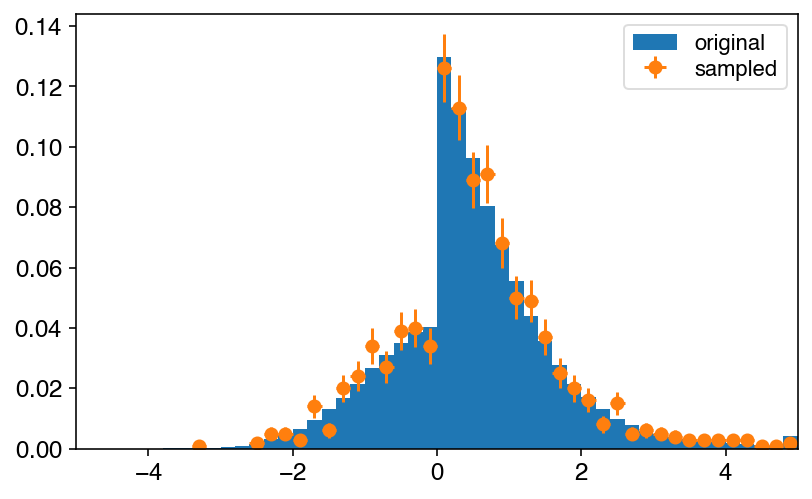

In [16]:
h1 = Hist1D.from_random("norm", bins="50,-5,5") + Hist1D.from_random("expon", bins="50,-5,5")
h2 = Hist1D(h1.sample(1e3), bins=h1.edges)

h1.normalize().plot(label="original")
h2.normalize().plot(histtype="step", label="sampled", show_errors=True)

Histogram objects are pickle-able, and can be de/serialized from/to json.

In [17]:
num.to_json()

# or 
#    num.to_json("test.json")
#    num = Hist1D.from_json("test.json")

'{"_counts": [1.0, 3.0, 2.0, 2.0, 9.0, 10.0, 17.0, 31.0, 34.0, 38.0, 54.0, 63.0, 87.0, 68.0, 71.0, 85.0, 88.0, 63.0, 71.0, 48.0, 44.0, 20.0, 35.0, 16.0, 16.0, 11.0, 3.0, 6.0, 2.0, 2.0], "_edges": [-3.0, -2.8, -2.6, -2.4, -2.2, -2.0, -1.7999999999999998, -1.5999999999999999, -1.4, -1.2, -1.0, -0.7999999999999998, -0.5999999999999996, -0.3999999999999999, -0.19999999999999973, 0.0, 0.20000000000000018, 0.40000000000000036, 0.6000000000000001, 0.8000000000000003, 1.0, 1.2000000000000002, 1.4000000000000004, 1.6000000000000005, 1.8000000000000007, 2.0, 2.2, 2.4000000000000004, 2.6000000000000005, 2.8000000000000007, 3.0], "_errors": [1.0, 1.7320508075688772, 1.4142135623730951, 1.4142135623730951, 3.0, 3.1622776601683795, 4.123105625617661, 5.5677643628300215, 5.830951894845301, 6.164414002968976, 7.3484692283495345, 7.937253933193772, 9.327379053088816, 8.246211251235321, 8.426149773176359, 9.219544457292887, 9.38083151964686, 7.937253933193772, 8.426149773176359, 6.928203230275509, 6.633

In [18]:
Hist1D.from_json(num.to_json())

[ 1.00 ± 1.00    3.00 ± 1.73    2.00 ± 1.41    2.00 ± 1.41    9.00 ± 3.00
 10.00 ± 3.16   17.00 ± 4.12   31.00 ± 5.57   34.00 ± 5.83   38.00 ± 6.16
 54.00 ± 7.35   63.00 ± 7.94   87.00 ± 9.33   68.00 ± 8.25   71.00 ± 8.43
 85.00 ± 9.22   88.00 ± 9.38   63.00 ± 7.94   71.00 ± 8.43   48.00 ± 6.93
 44.00 ± 6.63   20.00 ± 4.47   35.00 ± 5.92   16.00 ± 4.00   16.00 ± 4.00
 11.00 ± 3.32    3.00 ± 1.73    6.00 ± 2.45    2.00 ± 1.41    2.00 ± 1.41]

## 2D histograms

2D histograms are basically wrapped around `np.histogram2d()`. The string representation has a matrix of counts and errors.

In [19]:
from yahist import Hist2D

N = 50000
v = lambda:np.random.normal(0,1,N)
lsp = np.linspace
h = Hist2D(np.c_[v(), v()], bins=[lsp(-3,3,51), lsp(-3,3,51)])

print(str(h))

[[ 0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00   ...    1.00 ± 1.00
   0.00 ± 0.00    1.00 ± 1.00]
 [ 0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00   ...    0.00 ± 0.00
   0.00 ± 0.00    0.00 ± 0.00]
 [ 2.00 ± 1.41    0.00 ± 0.00    0.00 ± 0.00   ...    0.00 ± 0.00
   0.00 ± 0.00    0.00 ± 0.00]
 ...
 [ 0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00   ...    0.00 ± 0.00
   0.00 ± 0.00    0.00 ± 0.00]
 [ 0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00   ...    0.00 ± 0.00
   0.00 ± 0.00    0.00 ± 0.00]
 [ 1.00 ± 1.00    0.00 ± 0.00    0.00 ± 0.00   ...    0.00 ± 0.00
   0.00 ± 0.00    0.00 ± 0.00]]


Similar to the 1D object, the HTML representation for 2D histograms is a rendered plot.

In [20]:
h

[[ 0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00   ...    1.00 ± 1.00
   0.00 ± 0.00    1.00 ± 1.00]
 [ 0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00   ...    0.00 ± 0.00
   0.00 ± 0.00    0.00 ± 0.00]
 [ 2.00 ± 1.41    0.00 ± 0.00    0.00 ± 0.00   ...    0.00 ± 0.00
   0.00 ± 0.00    0.00 ± 0.00]
 ...
 [ 0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00   ...    0.00 ± 0.00
   0.00 ± 0.00    0.00 ± 0.00]
 [ 0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00   ...    0.00 ± 0.00
   0.00 ± 0.00    0.00 ± 0.00]
 [ 1.00 ± 1.00    0.00 ± 0.00    0.00 ± 0.00   ...    0.00 ± 0.00
   0.00 ± 0.00    0.00 ± 0.00]]

Or just plot it explicitly with matplotlib. kwargs are passed to `pcolorfast`, except for a few which are available for convenience: `logz`, ...

(<matplotlib.image.AxesImage at 0x115519e10>, <AxesSubplot:>)

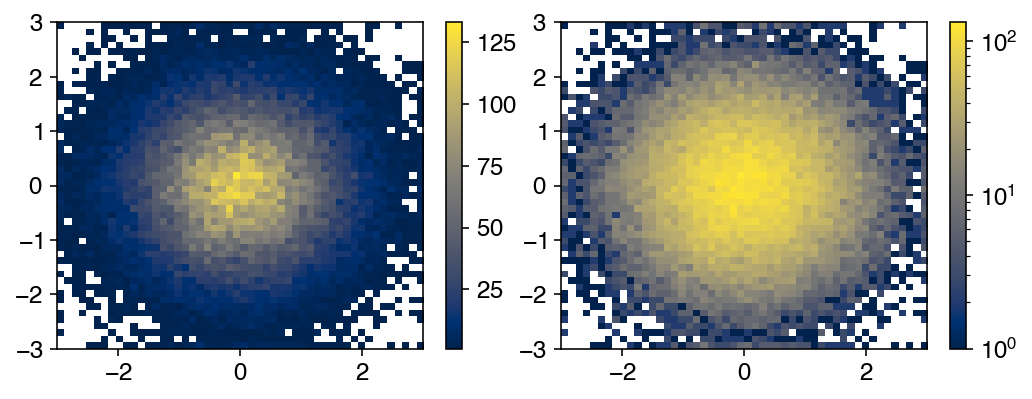

In [21]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,3))
h.plot(ax=ax1, cmap="cividis")
h.plot(ax=ax2, cmap="cividis", logz=True)

Chain a few methods together. `projection("x")` projects the bin contents onto the x-axis by summing, returning a `Hist1D`.

<AxesSubplot:>

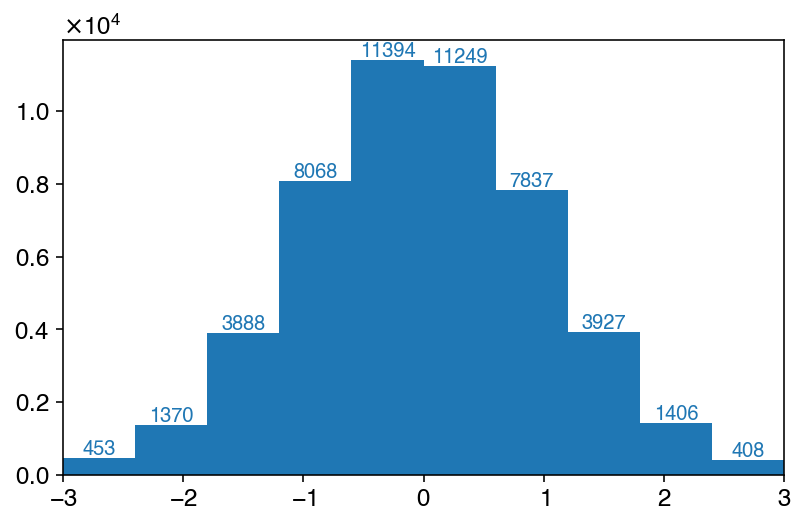

In [22]:
(h
 .rebin(5)
 .projection("x")
 .plot(show_counts=True)
)

`profile("x")` profiles/integrates out the y dimension. That is, for each constant-x slice, the profiled value is the mean y value. In the case for this symmetric gaussian, they are close to 0.

<AxesSubplot:>

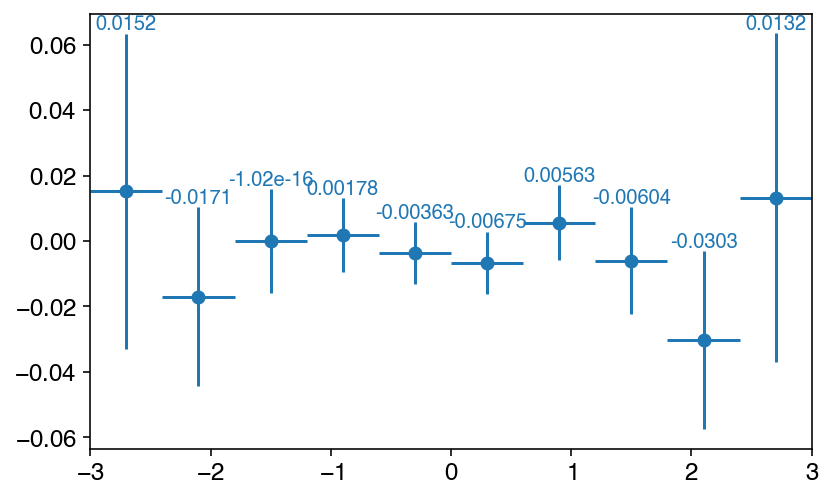

In [23]:
(h
 .rebin(5)
 .profile("x")
 .plot(show_counts=True,show_errors=True, counts_fmt_func="{:.3g}".format)
)

Hist2D is aware of pandas DataFrame column names.

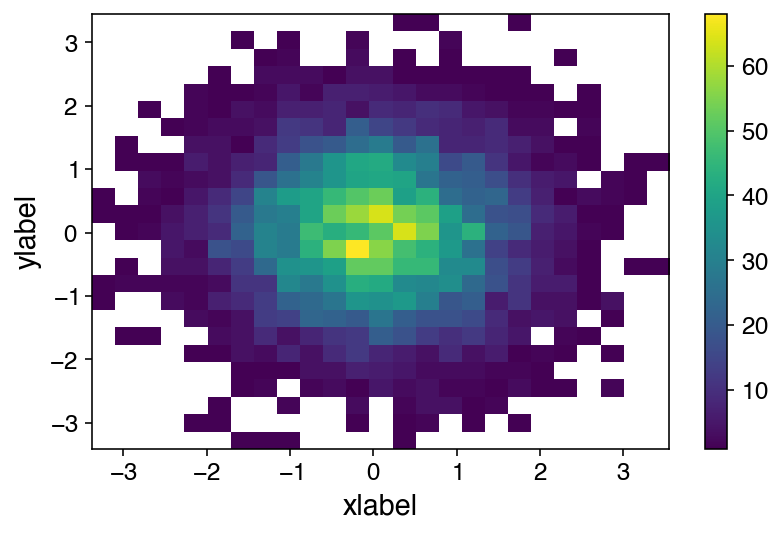

In [24]:
try:
    import pandas as pd
    df = pd.DataFrame(np.random.normal(size=(5000, 3)), columns=["xlabel", "ylabel", "zlabel"])
    Hist2D(df[["xlabel","ylabel"]], bins=25).plot()
except:
    pass

When non-uniform bins are specified, it can be hard to see some bin contents. In this case, the `equidistant=True` parameter can be used to make the bin sizes equal.

(<matplotlib.image.AxesImage at 0x114c6f438>, <AxesSubplot:>)

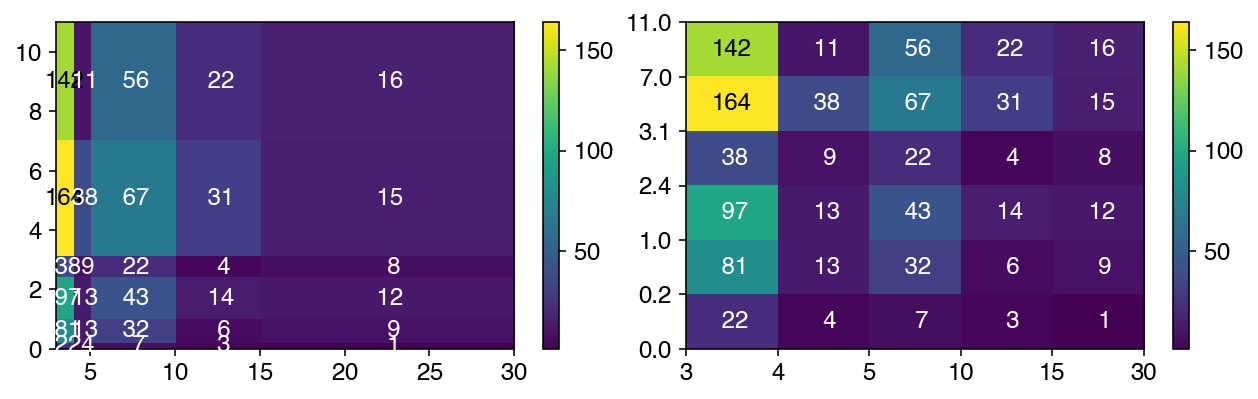

In [25]:
bins = [
    np.array([3,4,5,10,15,30]),
    np.array([0,0.2,1.0,2.4,3.1,7.0,11.]),
]
h = Hist2D.from_random("expon", params=[0, 5], bins=bins, size=1e3, random_state=42)

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,3))
h.plot(ax=ax1, show_counts=True)
h.plot(ax=ax2, show_counts=True, equidistant=True)

## Stacking histograms

The `bottom` kwarg of `plt.hist()` allows one to easily stack histograms, so the wrapper code in `utils.plot_stack` is pretty simple.

In [26]:
from yahist.utils import plot_stack
import inspect
print(inspect.getsource(plot_stack))

def plot_stack(hists, **kwargs):
    """
    Plots a list of `Hist1D` objects as a stack

    Parameters
    ----------
    hists : list of `Hist1D` objects
    kwargs : passed to `Hist1D.plot()`
    """
    bottom = 0.0
    for h in hists:
        h.plot(bottom=bottom, **kwargs)
        bottom += h.counts



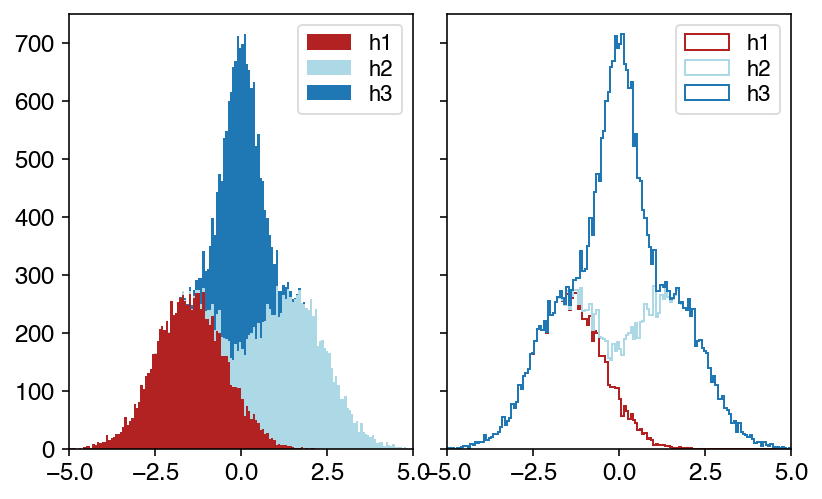

In [27]:
h1 = Hist1D(np.random.normal(-1.5,1,10000), bins="150,-5,5", color="firebrick", label="h1")
h2 = Hist1D(np.random.normal(1.5,1,10000), bins="150,-5,5", color="lightblue", label="h2")
h3 = Hist1D(np.random.normal(0.0,0.5,10000), bins="150,-5,5", label="h3")
fig, (ax1,ax2) = plt.subplots(1,2,sharey=True)
plot_stack([h1,h2,h3],ax=ax1)
plot_stack([h1,h2,h3],histtype="step",ax=ax2)

## Simple fits

While this is not a fitting package, there is a function for conveniently fitting a user-provided 
function to a histogram, taking into account the histogram errors. The function is a wrapper around `scipy.optimize.curve_fit`.

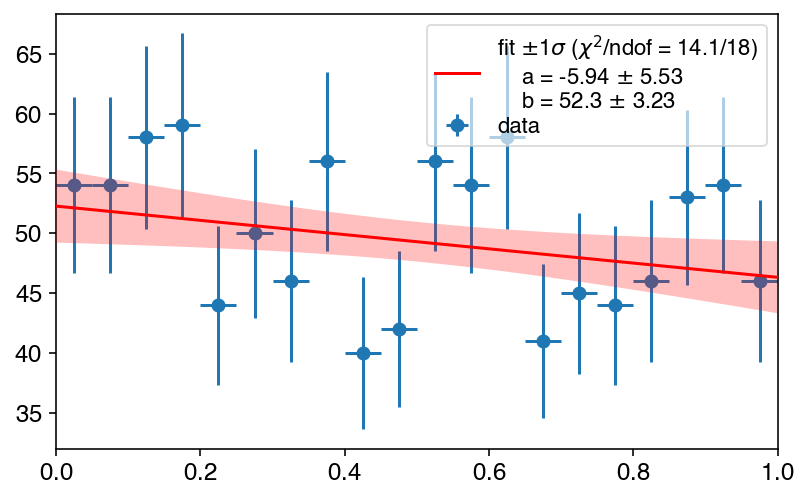

In [28]:
np.random.seed(42)
h = Hist1D(np.random.random(1000), bins="20,0,1")
h.plot(show_errors=True, label="data")
# parses an expression string, assuming the main parameter is `x`
res = h.fit("a*x+b")
# OR h.fit(lambda x,a,b: a*x+b)

Note that `curve_fit` minimizes chi2 by default. To minimize log likelihood, pass the `likelihood=True` option. In the limit of large counts, both are equivalent. Log likelihood is more correct for low counts, especially when some bins are empty.

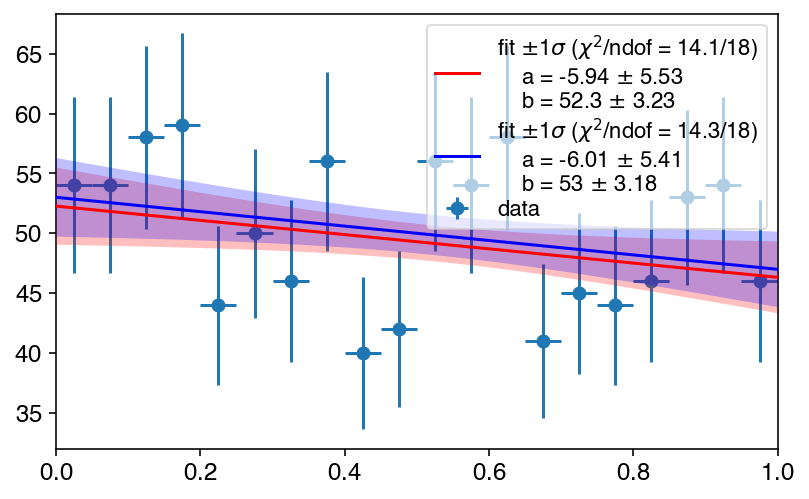

In [29]:
h.plot(show_errors=True, label="data")
res = h.fit("a*x+b", color="r")
res = h.fit("a*x+b", color="b", likelihood=True)

Or a slightly more complicated fit, with a ratio panel...

<AxesSubplot:>

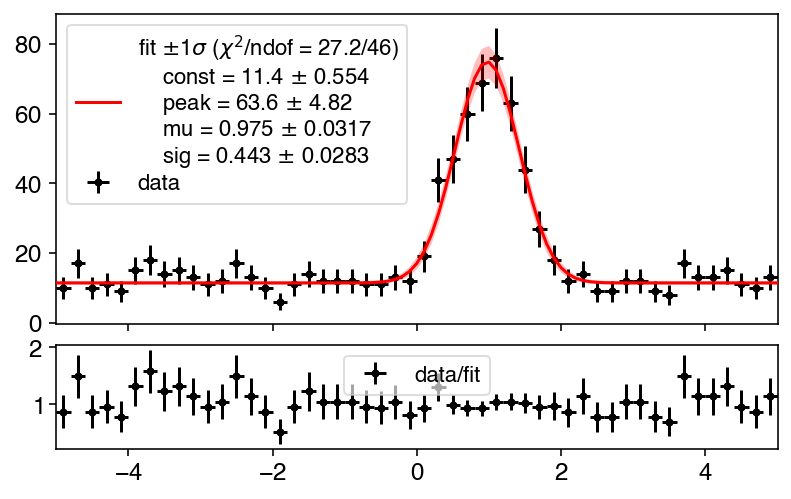

In [30]:
np.random.seed(42)

fig,(ax1,ax2) = plt.subplots(2,sharex=True,gridspec_kw=dict(height_ratios=[3, 1]))

bins = "50,-5,5"
hdata = (Hist1D(np.random.normal(1,0.5,350), bins=bins) 
         + Hist1D(10*np.random.random(600)-5, bins=bins))
hdata.plot(ax=ax1,show_errors=True, color="k",markersize=3,label="data")

result = hdata.fit("const+peak*np.exp(-(x-mu)**2/(2*sig**2))", ax=ax1)

ratio = (hdata/result["hfit"])
ratio.plot(ax=ax2, color="k", label="data/fit", show_errors=True,markersize=3)

The returned `result` object has an HTML representation for notebooks showing the fit parameters. The object itself is a `dict` containing information about the parameters and including a `Hist1D` object of the fit. 

In [31]:
result

parameter,value
const,11.4 ± 0.554
peak,63.57 ± 4.824
mu,0.9748 ± 0.03169
sig,0.4427 ± 0.02828


In [32]:
dict(result)

{'params': {'const': {'value': 11.401799862316922,
   'error': 0.5539975115194543},
  'peak': {'value': 63.57346635674767, 'error': 4.824321045909632},
  'mu': {'value': 0.9748175734569489, 'error': 0.03169181603432349},
  'sig': {'value': 0.44270050635321656, 'error': 0.028277234126156472}},
 'chi2': 27.177204062645963,
 'ndof': 46,
 'hfit': [11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56
  11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56
  11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56
  11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56
  11.41 ± 0.56   11.45 ± 0.55   11.65 ± 0.56   12.41 ± 0.71   14.74 ± 1.28
  20.42 ± 2.21   31.30 ± 3.07   47.17 ± 3.51   63.83 ± 3.98   74.07 ± 4.61
  72.48 ± 4.50   59.94 ± 3.82   42.86 ± 3.39   28.02 ± 2.82   18.56 ± 1.89
  13.92 ± 1.05   12.12 ± 0.63   11.57 ± 0.55   11.43 ± 0.56   11.41 ± 0.56
  11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0

<AxesSubplot:>

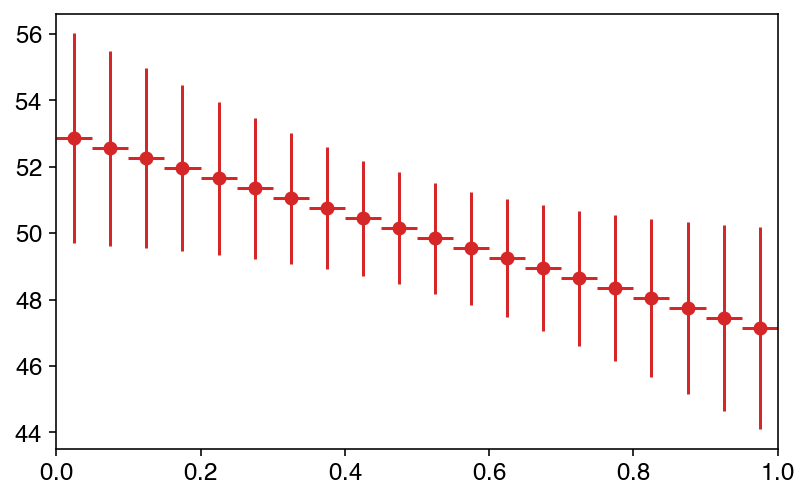

In [33]:
res["hfit"].plot(show_errors=True,color="C3")

## Fluent interface

This is kind of a pointless example, but it shows the fluent interface. `plot` and `fit` are usually methods used terminally,
but one can use the `return_self` keyword argument to plot and return the `Hist` object instead of the matplotlib ones to allow further chaining.

parameter,value
a,0.006997 ± 0.003268
b,-0.0002599 ± 0.003163


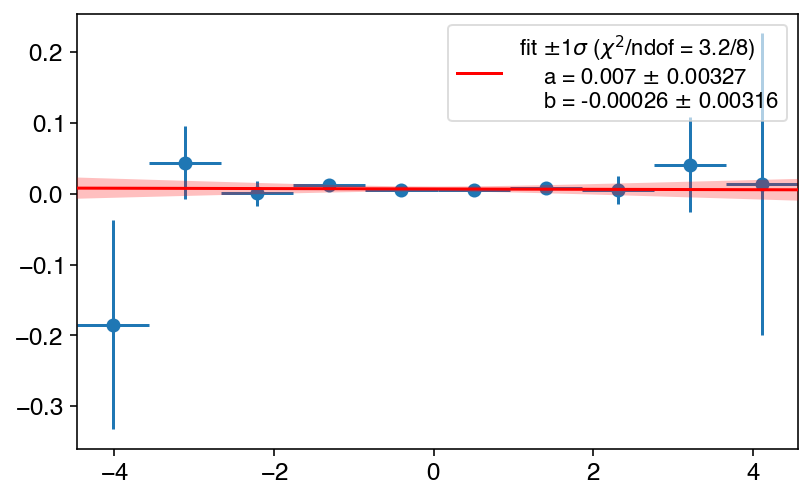

In [34]:
(Hist2D
 .from_random("norm", bins=20) # 2d gaussian centered at (0,0)
 .rebin(2) # combine adjacent pairs of bins into one
 .transpose() # flip x/y
 .normalize() # scale counts so that integral = 1
 .profile("x") # profile out y axis, giving a Hist1D
 .plot(show_errors=True, return_self=True) # plot and return self object
 .fit("a+b*x") # fit line and return fit object
)